# Optimal Pricing

Mexico City, Bogota and Quito are crowded cities with people willing to travel. As most of them are tourists, they rely on cabs to take them from one point to another. The cab aggregators named Ilumin have developed an app that can be used to book travel in & around each of the cities. 
Since the app is new, the management is unsure of its pricing model. Your task is to help Ilumin with the following, so that they can design their business model and app accordingly.

## Get the Data
Ilumin has collected and shared following datasets of past travels that were booked using the cabs, the cars which are being used in these cities and fuel prices in each of the cities for the past few years.

The data is already provided for you.  You might be using a subset of the original dataset. 

In [1]:
"""
MAKE PATH CONSISTENT AND CLEAR
"""
import csv
import numpy as np
from pandas import read_csv

path = r"/content"

In [2]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [157]:
bogota = pd.read_csv(r'/content/bogota.csv')
bogota.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,Bogotá,18-09-2019 01:54,18-09-2019 02:17,-74.170353,4.622699,-74.119259,4.572322,N,1419,11935,293
1,2,Bogotá,18-09-2019 03:31,18-09-2019 03:44,-74.123542,4.604075,-74.116125,4.572578,N,782,7101,139
2,3,Bogotá,07-08-2019 03:35,18-09-2019 04:30,-74.178643,4.646176,-74.178711,4.646367,N,3632095,2655,2534
3,4,Bogotá,18-09-2019 04:31,18-09-2019 04:32,-74.163398,4.641949,-74.165813,4.640649,N,66,318,52
4,5,Bogotá,13-09-2019 12:07,18-09-2019 05:00,-74.137539,4.596347,-74.125364,4.576745,N,449620,3228,211


time: 46.1 ms (started: 2021-11-12 01:08:21 +00:00)


In [158]:
mexico = pd.read_csv(r'/content/mexico_city.csv')
mexico.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,México DF Taxi de Sitio,16-09-2019 07:14,18-09-2019 04:41,-99.097369,19.416874,-99.202729,19.430353,N,120449,12373,242
1,2,México DF Taxi Libre,18-09-2019 06:16,18-09-2019 10:11,-99.297148,19.322128,-99.289949,19.326538,N,14110,1700,461
2,3,México DF Taxi Libre,18-09-2019 10:11,18-09-2019 10:23,-99.289603,19.326263,-99.271874,19.328530,N,681,2848,129
3,4,México DF Taxi Libre,18-09-2019 10:23,18-09-2019 10:30,-99.271161,19.328875,-99.279900,19.326256,N,436,1409,106
4,5,México DF Taxi Libre,18-09-2019 10:44,18-09-2019 10:51,-99.282761,19.326944,-99.291705,19.322754,N,442,1567,85


time: 63 ms (started: 2021-11-12 01:08:25 +00:00)


In [159]:
quito = pd.read_csv(r'/content/quito.csv')
quito.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,Quito,17-09-2019 09:32,17-09-2019 10:05,-78.503922,-0.232824,-78.549447,-0.361363,N,2025,24228,346
1,2,Quito,18-09-2019 04:03,18-09-2019 04:26,-78.440306,0.006789,-78.490786,-0.104836,N,1390,16680,456
2,3,Quito,16-09-2019 06:29,18-09-2019 06:41,-78.469551,-0.143636,-78.470277,-0.131083,N,130317,1987,290
3,4,Quito,18-09-2019 05:57,18-09-2019 06:30,-78.558076,-0.278241,-78.430220,-0.201934,N,1933,25146,302
4,5,Quito,18-09-2019 07:58,18-09-2019 08:14,-78.521818,-0.208480,-78.504558,-0.222462,N,948,4625,314


time: 97.4 ms (started: 2021-11-12 01:08:29 +00:00)


## 1) Bogota city

In [6]:
bogota.shape

(3063, 12)

In [7]:
bogota.describe()

,id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec
count,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3.063000e+03,3.063000e+03,3.063000e+03
mean,1532.000000,-74.098884,4.670920,-74.100136,4.669038,9.295603e+04,-1.392301e+06,9.652921e+05
std,884.356263,0.138975,0.091885,0.139508,0.092942,5.899404e+05,5.486590e+07,3.757377e+07
min,1.000000,-76.534419,3.391712,-76.542536,3.391941,2.000000e+00,-2.147484e+09,0.000000e+00
25%,766.500000,-74.123948,4.629166,-74.122538,4.625974,5.385000e+02,1.672000e+03,9.100000e+01
50%,1532.000000,-74.085985,4.683676,-74.089411,4.677560,1.442000e+03,5.375000e+03,3.000000e+02
75%,2297.500000,-74.055464,4.717402,-74.058683,4.719314,3.813000e+03,1.085600e+04,8.445000e+02
max,3063.000000,-73.829723,5.029401,-73.615700,5.029189,1.227617e+07,3.478510e+05,1.471920e+09


In [8]:
bogota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3063 non-null   int64  
 1   vendor_id           3063 non-null   object 
 2   pickup_datetime     3063 non-null   object 
 3   dropoff_datetime    3063 non-null   object 
 4   pickup_longitude    3063 non-null   float64
 5   pickup_latitude     3063 non-null   float64
 6   dropoff_longitude   3063 non-null   float64
 7   dropoff_latitude    3063 non-null   float64
 8   store_and_fwd_flag  3063 non-null   object 
 9   trip_duration       3063 non-null   int64  
 10  dist_meters         3063 non-null   int64  
 11  wait_sec            3063 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 287.3+ KB


In [9]:
bogota.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dist_meters           0
wait_sec              0
dtype: int64

In [10]:
bogota.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,Bogotá,18-09-2019 01:54,18-09-2019 02:17,-74.170353,4.622699,-74.119259,4.572322,N,1419,11935,293
1,2,Bogotá,18-09-2019 03:31,18-09-2019 03:44,-74.123542,4.604075,-74.116125,4.572578,N,782,7101,139
2,3,Bogotá,07-08-2019 03:35,18-09-2019 04:30,-74.178643,4.646176,-74.178711,4.646367,N,3632095,2655,2534
3,4,Bogotá,18-09-2019 04:31,18-09-2019 04:32,-74.163398,4.641949,-74.165813,4.640649,N,66,318,52
4,5,Bogotá,13-09-2019 12:07,18-09-2019 05:00,-74.137539,4.596347,-74.125364,4.576745,N,449620,3228,211


In [11]:
bogota.columns 

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'dist_meters', 'wait_sec'],
      dtype='object')

In [12]:
bogota['wait_sec'].value_counts().sort_values(ascending = False).head(20)

0         60
1         17
10        16
114535    15
47        15
4         15
91        15
6         14
5         14
17        14
34        13
70        13
12        12
18        12
26        11
2         11
3         11
19        11
27        11
13        11
Name: wait_sec, dtype: int64

In [13]:
bogota['wait_sec'].nunique()

1310

In [14]:
bogota.dtypes 

id                      int64
vendor_id              object
pickup_datetime        object
dropoff_datetime       object
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dist_meters             int64
wait_sec                int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febd9dc7950>,
      dtype=object)

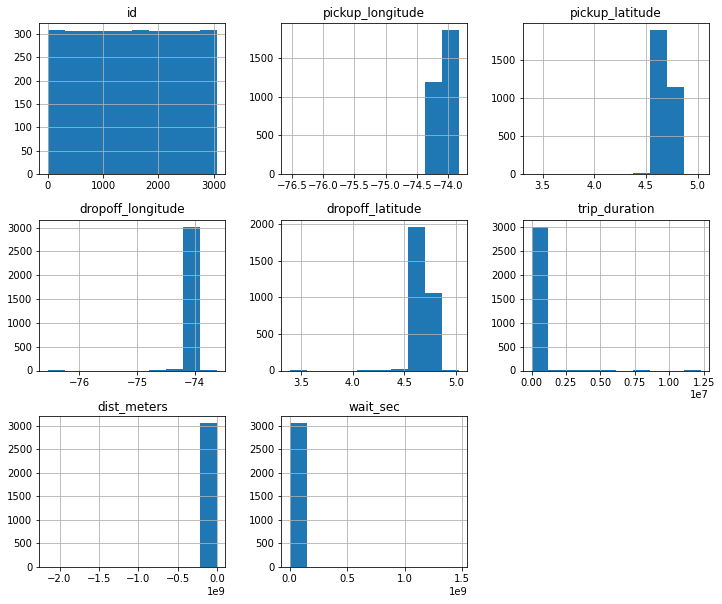

In [15]:
bogota.hist(figsize=(12,10))

In [16]:
import datetime as dt
bogota['pickup_datetime'] = pd.to_datetime(bogota['pickup_datetime'], errors='coerce')

bogota['dropoff_datetime'] = pd.to_datetime(bogota['dropoff_datetime'],errors='coerce')

In [17]:
bogota.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,Bogotá,2019-09-18 01:54:00,2019-09-18 02:17:00,-74.170353,4.622699,-74.119259,4.572322,N,1419,11935,293
1,2,Bogotá,2019-09-18 03:31:00,2019-09-18 03:44:00,-74.123542,4.604075,-74.116125,4.572578,N,782,7101,139
2,3,Bogotá,2019-07-08 03:35:00,2019-09-18 04:30:00,-74.178643,4.646176,-74.178711,4.646367,N,3632095,2655,2534
3,4,Bogotá,2019-09-18 04:31:00,2019-09-18 04:32:00,-74.163398,4.641949,-74.165813,4.640649,N,66,318,52
4,5,Bogotá,2019-09-13 12:07:00,2019-09-18 05:00:00,-74.137539,4.596347,-74.125364,4.576745,N,449620,3228,211


In [18]:
bogota['Pickup_year'] = bogota['pickup_datetime'].dt.year
bogota['pickup_month']=bogota['pickup_datetime'].dt.month 
bogota['pickup_day']=bogota['pickup_datetime'].dt.day

bogota['pickup_Hour'] = bogota['pickup_datetime'].dt.hour 
bogota['pickup_minute'] = bogota['pickup_datetime'].dt.minute 

bogota['dropoff_year'] = bogota['dropoff_datetime'].dt.year
bogota['dropoff_month']= bogota['dropoff_datetime'].dt.month 
bogota['dropoff_day']= bogota['dropoff_datetime'].dt.day

bogota['dropoff_Hour'] = bogota['dropoff_datetime'].dt.hour 
bogota['dropoff_minute'] = bogota['dropoff_datetime'].dt.minute 


In [19]:
bogota.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute
0,1,Bogotá,2019-09-18 01:54:00,2019-09-18 02:17:00,-74.170353,4.622699,-74.119259,4.572322,N,1419,11935,293,2019,9,18,1,54,2019,9,18,2,17
1,2,Bogotá,2019-09-18 03:31:00,2019-09-18 03:44:00,-74.123542,4.604075,-74.116125,4.572578,N,782,7101,139,2019,9,18,3,31,2019,9,18,3,44
2,3,Bogotá,2019-07-08 03:35:00,2019-09-18 04:30:00,-74.178643,4.646176,-74.178711,4.646367,N,3632095,2655,2534,2019,7,8,3,35,2019,9,18,4,30
3,4,Bogotá,2019-09-18 04:31:00,2019-09-18 04:32:00,-74.163398,4.641949,-74.165813,4.640649,N,66,318,52,2019,9,18,4,31,2019,9,18,4,32
4,5,Bogotá,2019-09-13 12:07:00,2019-09-18 05:00:00,-74.137539,4.596347,-74.125364,4.576745,N,449620,3228,211,2019,9,13,12,7,2019,9,18,5,0


In [20]:
bogota['store_and_fwd_flag'].unique()

array(['N'], dtype=object)

In [21]:
bogota_df = bogota.drop(['id','vendor_id','pickup_datetime','dropoff_datetime','store_and_fwd_flag'],axis=1)
bogota_df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute
0,-74.170353,4.622699,-74.119259,4.572322,1419,11935,293,2019,9,18,1,54,2019,9,18,2,17
1,-74.123542,4.604075,-74.116125,4.572578,782,7101,139,2019,9,18,3,31,2019,9,18,3,44
2,-74.178643,4.646176,-74.178711,4.646367,3632095,2655,2534,2019,7,8,3,35,2019,9,18,4,30
3,-74.163398,4.641949,-74.165813,4.640649,66,318,52,2019,9,18,4,31,2019,9,18,4,32
4,-74.137539,4.596347,-74.125364,4.576745,449620,3228,211,2019,9,13,12,7,2019,9,18,5,0


## 2).Mexico city

In [22]:
mexico.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,México DF Taxi de Sitio,16-09-2019 07:14,18-09-2019 04:41,-99.097369,19.416874,-99.202729,19.430353,N,120449,12373,242
1,2,México DF Taxi Libre,18-09-2019 06:16,18-09-2019 10:11,-99.297148,19.322128,-99.289949,19.326538,N,14110,1700,461
2,3,México DF Taxi Libre,18-09-2019 10:11,18-09-2019 10:23,-99.289603,19.326263,-99.271874,19.328530,N,681,2848,129
3,4,México DF Taxi Libre,18-09-2019 10:23,18-09-2019 10:30,-99.271161,19.328875,-99.279900,19.326256,N,436,1409,106
4,5,México DF Taxi Libre,18-09-2019 10:44,18-09-2019 10:51,-99.282761,19.326944,-99.291705,19.322754,N,442,1567,85


In [23]:
mexico.shape 

(12694, 12)

In [24]:
mexico.describe()

,id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec
count,12694.000000,12694.000000,12694.000000,12694.000000,12694.000000,1.269400e+04,12694.000000,1.269400e+04
mean,6347.500000,-99.136155,19.385067,-99.133728,19.386764,2.298377e+04,6666.431700,1.161270e+06
std,3664.586493,0.430001,0.129518,0.429582,0.131199,2.293364e+05,11386.891512,5.799612e+07
min,1.000000,-108.985069,18.829117,-108.987429,18.829103,2.000000e+00,21.000000,0.000000e+00
25%,3174.250000,-99.195615,19.325832,-99.192102,19.325325,4.840000e+02,1775.000000,8.900000e+01
50%,6347.500000,-99.164436,19.371382,-99.160705,19.374913,1.033500e+03,3948.000000,2.340000e+02
75%,9520.750000,-99.107092,19.432106,-99.107355,19.434360,2.368750e+03,8265.000000,5.910000e+02
max,12694.000000,-86.871347,25.752964,-86.871002,25.781058,1.657095e+07,802537.000000,4.429346e+09


In [25]:
mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12694 entries, 0 to 12693
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  12694 non-null  int64  
 1   vendor_id           12694 non-null  object 
 2   pickup_datetime     12694 non-null  object 
 3   dropoff_datetime    12694 non-null  object 
 4   pickup_longitude    12694 non-null  float64
 5   pickup_latitude     12694 non-null  float64
 6   dropoff_longitude   12694 non-null  float64
 7   dropoff_latitude    12694 non-null  float64
 8   store_and_fwd_flag  12694 non-null  object 
 9   trip_duration       12694 non-null  int64  
 10  dist_meters         12694 non-null  int64  
 11  wait_sec            12694 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 1.2+ MB


In [26]:
mexico.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dist_meters           0
wait_sec              0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febd9a81f10>,
      dtype=object)

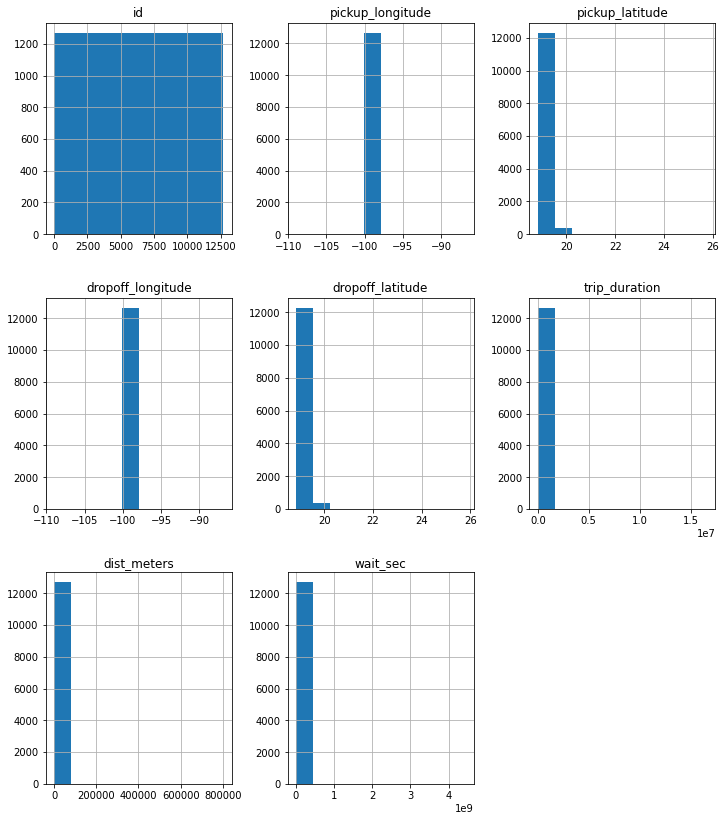

In [27]:
mexico.hist(figsize=(12,14))

In [28]:
import datetime as dt
mexico['pickup_datetime'] = pd.to_datetime(mexico['pickup_datetime'], errors='coerce')

mexico['dropoff_datetime'] = pd.to_datetime(mexico['dropoff_datetime'],errors='coerce')

In [29]:
mexico['Pickup_year'] = mexico['pickup_datetime'].dt.year
mexico['pickup_month']=mexico['pickup_datetime'].dt.month 
mexico['pickup_day']=mexico['pickup_datetime'].dt.day

mexico['pickup_Hour'] = mexico['pickup_datetime'].dt.hour 
mexico['pickup_minute'] = mexico['pickup_datetime'].dt.minute 

mexico['dropoff_year'] = mexico['dropoff_datetime'].dt.year
mexico['dropoff_month']= mexico['dropoff_datetime'].dt.month 
mexico['dropoff_day']= mexico['dropoff_datetime'].dt.day

mexico['dropoff_Hour'] = mexico['dropoff_datetime'].dt.hour 
mexico['dropoff_minute'] = mexico['dropoff_datetime'].dt.minute 


In [30]:
mexico_df = mexico.drop(['id','vendor_id','pickup_datetime','dropoff_datetime','store_and_fwd_flag'],axis=1)
mexico_df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute
0,-99.097369,19.416874,-99.202729,19.430353,120449,12373,242,2019,9,16,7,14,2019,9,18,4,41
1,-99.297148,19.322128,-99.289949,19.326538,14110,1700,461,2019,9,18,6,16,2019,9,18,10,11
2,-99.289603,19.326263,-99.271874,19.328530,681,2848,129,2019,9,18,10,11,2019,9,18,10,23
3,-99.271161,19.328875,-99.279900,19.326256,436,1409,106,2019,9,18,10,23,2019,9,18,10,30
4,-99.282761,19.326944,-99.291705,19.322754,442,1567,85,2019,9,18,10,44,2019,9,18,10,51


## 3). Quito city

In [31]:
quito.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,Quito,17-09-2019 09:32,17-09-2019 10:05,-78.503922,-0.232824,-78.549447,-0.361363,N,2025,24228,346
1,2,Quito,18-09-2019 04:03,18-09-2019 04:26,-78.440306,0.006789,-78.490786,-0.104836,N,1390,16680,456
2,3,Quito,16-09-2019 06:29,18-09-2019 06:41,-78.469551,-0.143636,-78.470277,-0.131083,N,130317,1987,290
3,4,Quito,18-09-2019 05:57,18-09-2019 06:30,-78.558076,-0.278241,-78.430220,-0.201934,N,1933,25146,302
4,5,Quito,18-09-2019 07:58,18-09-2019 08:14,-78.521818,-0.208480,-78.504558,-0.222462,N,948,4625,314


In [32]:
quito.shape 

(32366, 12)

In [33]:
quito.describe()

,id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec
count,32366.000000,32366.000000,32366.000000,32366.000000,32366.000000,3.236600e+04,3.236600e+04,3.236600e+04
mean,16183.500000,-78.492371,-0.189042,-78.492901,-0.191341,4.138239e+04,7.302745e+04,2.204058e+07
std,9343.403743,0.043108,0.076153,0.044783,0.085623,5.842226e+05,1.193671e+07,7.311736e+08
min,1.000000,-80.681697,-3.454279,-80.681721,-3.574739,-3.887110e+05,1.100000e+01,0.000000e+00
25%,8092.250000,-78.505867,-0.218344,-78.505734,-0.220508,5.000000e+02,2.148000e+03,1.070000e+02
50%,16183.500000,-78.490135,-0.181979,-78.490073,-0.185721,8.970000e+02,4.124000e+03,2.430000e+02
75%,24274.750000,-78.475783,-0.148715,-78.477443,-0.149867,1.710000e+03,7.475000e+03,4.990000e+02
max,32366.000000,-78.009669,0.866441,-77.710158,0.866759,7.002605e+07,2.147484e+09,9.516306e+10


In [34]:
quito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32366 entries, 0 to 32365
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  32366 non-null  int64  
 1   vendor_id           32366 non-null  object 
 2   pickup_datetime     32366 non-null  object 
 3   dropoff_datetime    32366 non-null  object 
 4   pickup_longitude    32366 non-null  float64
 5   pickup_latitude     32366 non-null  float64
 6   dropoff_longitude   32366 non-null  float64
 7   dropoff_latitude    32366 non-null  float64
 8   store_and_fwd_flag  32366 non-null  object 
 9   trip_duration       32366 non-null  int64  
 10  dist_meters         32366 non-null  int64  
 11  wait_sec            32366 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 3.0+ MB


In [35]:
quito.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dist_meters           0
wait_sec              0
dtype: int64

In [36]:
quito.dropna(inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febd8dbdd10>,
      dtype=object)

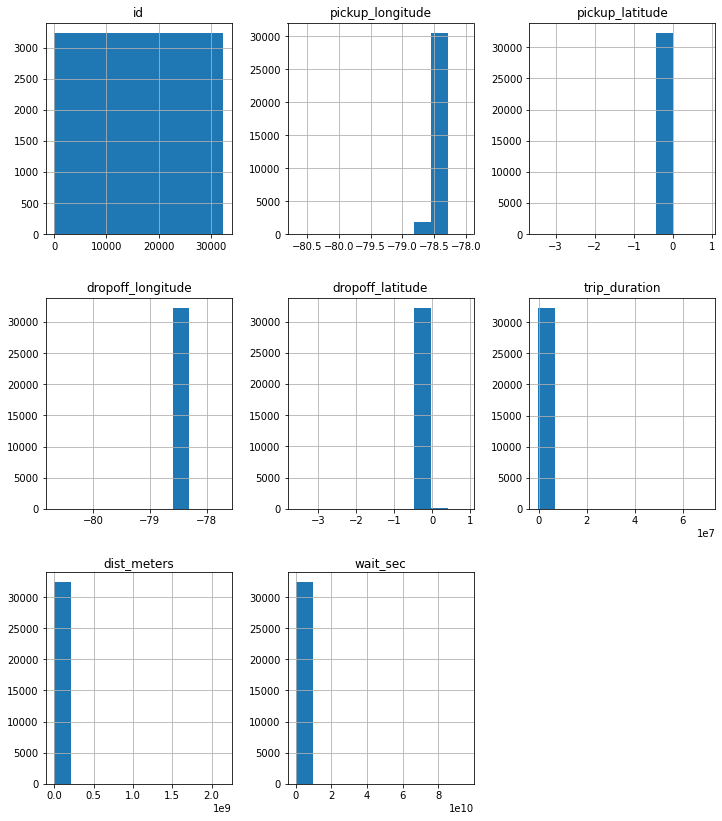

In [37]:
quito.hist(figsize=(12,14))

In [38]:
import datetime as dt
quito['pickup_datetime'] = pd.to_datetime(quito['pickup_datetime'], errors='coerce')

quito['dropoff_datetime'] = pd.to_datetime(quito['dropoff_datetime'],errors='coerce')

In [39]:
quito['Pickup_year'] = quito['pickup_datetime'].dt.year
quito['pickup_month']=quito['pickup_datetime'].dt.month 
quito['pickup_day']=quito['pickup_datetime'].dt.day

quito['pickup_Hour'] = quito['pickup_datetime'].dt.hour 
quito['pickup_minute'] = quito['pickup_datetime'].dt.minute 

quito['dropoff_year'] = quito['dropoff_datetime'].dt.year
quito['dropoff_month']= quito['dropoff_datetime'].dt.month 
quito['dropoff_day']= quito['dropoff_datetime'].dt.day

quito['dropoff_Hour'] = quito['dropoff_datetime'].dt.hour 
quito['dropoff_minute'] = quito['dropoff_datetime'].dt.minute 


In [40]:
quito_df = quito.drop(['id','vendor_id','pickup_datetime','dropoff_datetime','store_and_fwd_flag'],axis=1)
quito_df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute
0,-78.503922,-0.232824,-78.549447,-0.361363,2025,24228,346,2019,9,17,9,32,2019,9,17,10,5
1,-78.440306,0.006789,-78.490786,-0.104836,1390,16680,456,2019,9,18,4,3,2019,9,18,4,26
2,-78.469551,-0.143636,-78.470277,-0.131083,130317,1987,290,2019,9,16,6,29,2019,9,18,6,41
3,-78.558076,-0.278241,-78.430220,-0.201934,1933,25146,302,2019,9,18,5,57,2019,9,18,6,30
4,-78.521818,-0.208480,-78.504558,-0.222462,948,4625,314,2019,9,18,7,58,2019,9,18,8,14


## Outlier in the Data
Identify the outlier in each of the given datasets

## 1) Bogota city outliers detection

In [41]:

import seaborn as sns

sns.set(rc={'figure.figsize':(14.7,8.27)})


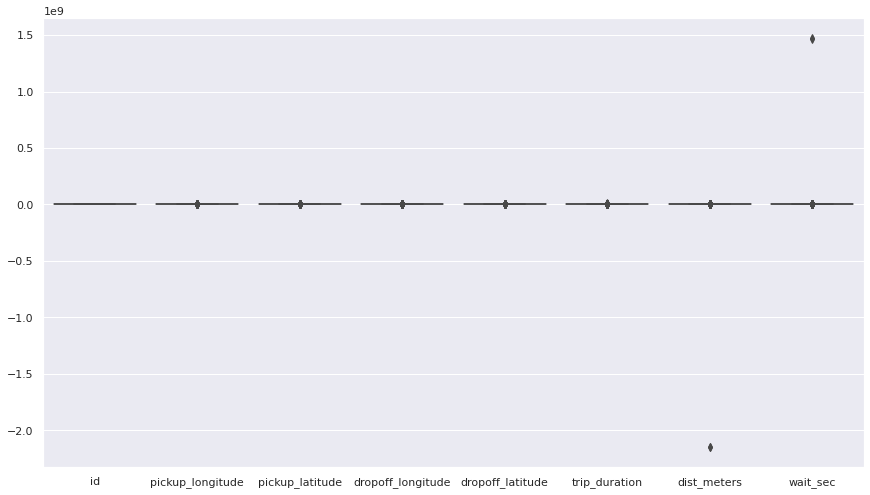

time: 405 ms (started: 2021-11-12 01:08:53 +00:00)


In [160]:
import seaborn as sns
sns.boxplot(data=bogota)


## Note: if we see the ouliers are at 'dist_meters' and 'wait_sec' columns

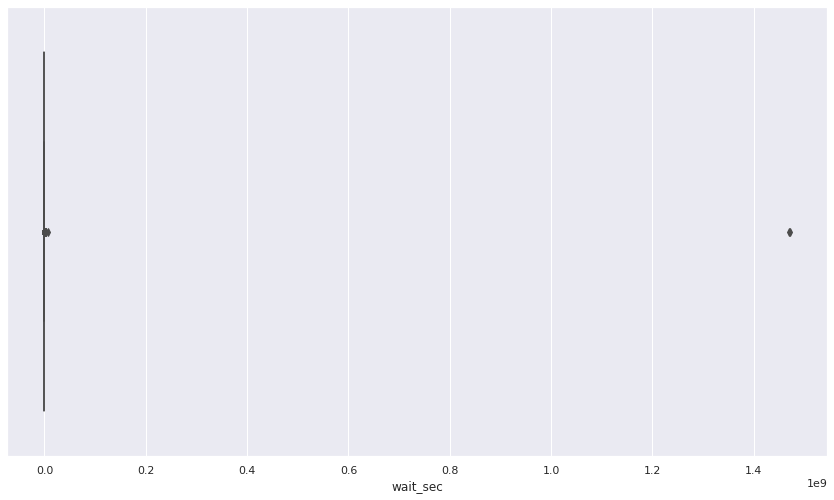

In [43]:
sns.boxplot(data=bogota,x = bogota['wait_sec'])  


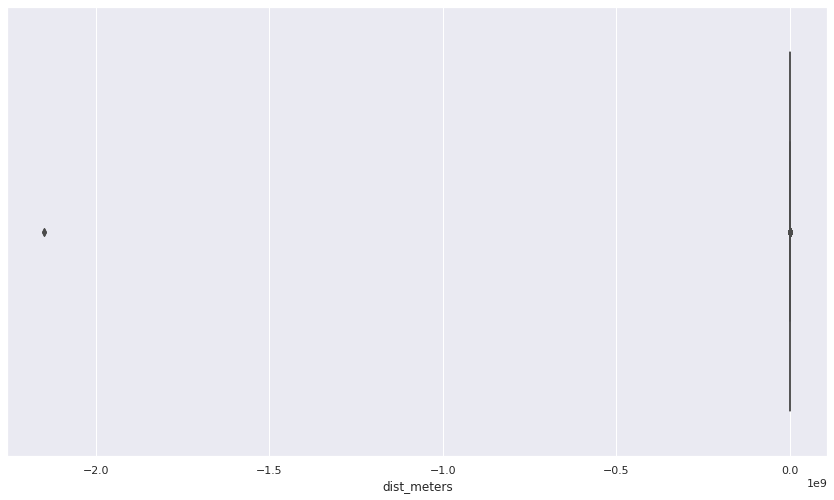

In [44]:
sns.boxplot(data=bogota,x = bogota['dist_meters'])  


In [45]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(bogota_df))
print(z) 

[[0.51433889 0.52488692 0.13709794 ... 0.2168343  1.54098929 0.70565309]
 [0.17745747 0.72760497 0.11463042 ... 0.2168343  1.22916725 0.87027563]
 [0.57400433 0.26933604 0.56332622 ... 0.2168343  0.91734521 0.0531274 ]
 ...
 [0.26864141 0.41680977 0.41394836 ... 1.26643415 1.85281133 0.76402082]
 [0.34508666 0.88339246 0.35315999 ... 1.26643415 0.64176498 1.23096267]
 [0.33580757 0.37369674 0.35424147 ... 1.38305636 0.29370114 1.22048201]]


In [46]:
threshold = 3
print(np.where(z > 3))  # These are the outliers
# The first array contains the list of row numbers and second array respective column numbers

(array([   2,   75,  139,  139,  143,  143,  452,  462,  601,  604,  610,
        611,  612,  613,  633,  728,  804,  804,  943,  943, 1157, 1242,
       1399, 1445, 1702, 1865, 1878, 1881, 1917, 1929, 1992, 2016, 2041,
       2041, 2120, 2120, 2192, 2214, 2215, 2420, 2420, 2436, 2640, 2663,
       2690, 2693, 2721, 2728, 2762, 2762, 2763, 2763, 2783, 2783, 2784,
       2784, 2785, 2785, 2814, 2814, 2848, 2885, 2887, 2888, 2889, 2890,
       2891, 2892, 2929, 2929, 2929, 2929, 2930, 2930, 2930, 2930, 2931,
       2931, 2931, 2931, 2932, 2932, 2932, 2932, 2933, 2935, 2935, 2935,
       2935, 2936, 2936, 2936, 2936, 2938, 2941, 2941, 2941, 2941, 2942,
       2942, 2942, 2942, 2944, 2944, 2944, 2944]), array([4, 4, 3, 4, 1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 3, 4, 4,
       4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 2, 3, 0, 2, 4, 5, 5, 3, 4, 4, 6, 3,
       4, 4, 4, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2,

In [47]:
Q1 = bogota_df.quantile(0.25)
Q3 = bogota_df.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print()
print(Q3)
print()
print(IQR)


pickup_longitude      -74.123948
pickup_latitude         4.629166
dropoff_longitude     -74.122538
dropoff_latitude        4.625974
trip_duration         538.500000
dist_meters          1672.000000
wait_sec               91.000000
Pickup_year          2019.000000
pickup_month            4.000000
pickup_day              9.000000
pickup_Hour             5.000000
pickup_minute          14.000000
dropoff_year         2019.000000
dropoff_month           4.000000
dropoff_day             9.000000
dropoff_Hour            5.000000
dropoff_minute         15.000000
Name: 0.25, dtype: float64

pickup_longitude       -74.055464
pickup_latitude          4.717402
dropoff_longitude      -74.058683
dropoff_latitude         4.719314
trip_duration         3813.000000
dist_meters          10856.000000
wait_sec               844.500000
Pickup_year           2020.000000
pickup_month            10.000000
pickup_day              24.000000
pickup_Hour              9.000000
pickup_minute           43.000000
dro

In [48]:
# outliers removal
bogota_df_out = bogota_df[~((bogota_df < (Q1 - 1.5 * IQR)) |(bogota_df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [49]:
bogota_df_out

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute
0,-74.170353,4.622699,-74.119259,4.572322,1419,11935,293,2019,9,18,1,54,2019,9,18,2,17
1,-74.123542,4.604075,-74.116125,4.572578,782,7101,139,2019,9,18,3,31,2019,9,18,3,44
3,-74.163398,4.641949,-74.165813,4.640649,66,318,52,2019,9,18,4,31,2019,9,18,4,32
7,-74.049168,4.736697,-74.050641,4.718745,191,2458,0,2019,9,18,10,8,2019,9,18,10,11
8,-74.049272,4.718333,-74.030313,4.710932,308,2358,93,2019,9,18,10,11,2019,9,18,10,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,-74.161670,4.591986,-74.157820,4.581066,140,1313,18,2019,10,27,4,13,2019,10,27,4,15
3054,-74.156281,4.578133,-74.157015,4.565806,1559,3940,1039,2019,10,27,4,16,2019,10,27,4,42
3055,-74.154898,4.637313,-74.048568,4.684500,4374,14743,1193,2019,10,27,6,37,2019,10,27,7,50
3056,-74.072112,4.631299,-74.042742,4.701864,3106,11368,780,2019,10,27,9,0,2019,10,27,9,52


In [50]:
bogota.shape  # before outliers removal 

(3063, 22)

In [51]:
bogota_df_out.shape  # after outliers removal

(2334, 17)

## 2).Mexico city outliers detection

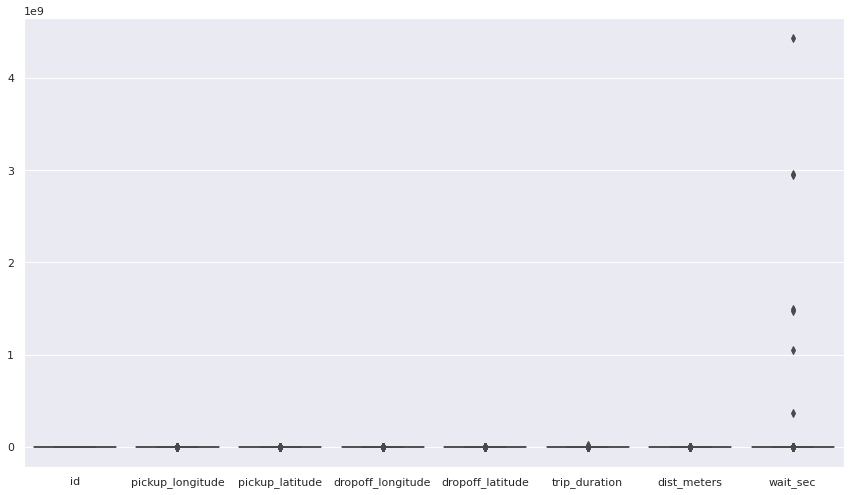

time: 414 ms (started: 2021-11-12 01:09:11 +00:00)


In [161]:
import seaborn as sns
sns.boxplot(data=mexico)


####  Note: The outlers are present in 'wait_sec' column

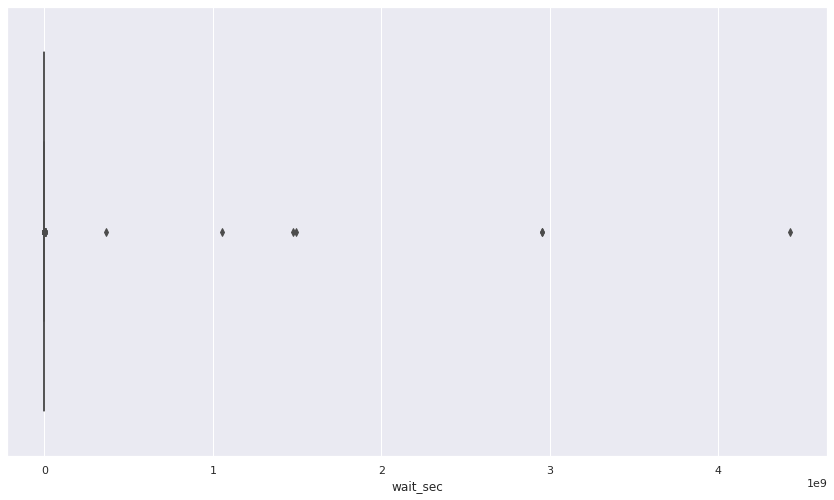

In [53]:
sns.boxplot(data=mexico,x = mexico['wait_sec'])  


In [54]:
z = np.abs(stats.zscore(mexico_df))
print(z) 

[[0.09020454 0.24558941 0.16062848 ... 0.25431369 0.83373498 0.67163011]
 [0.37441738 0.48597167 0.36367222 ... 0.25431369 1.00037602 1.05646503]
 [0.35686887 0.45404604 0.32159351 ... 0.25431369 1.00037602 0.36522698]
 ...
 [0.08019288 0.78316984 0.10351352 ... 1.29089444 1.30606119 0.49882059]
 [0.13542032 0.09034021 0.14175686 ... 1.40607007 0.22236465 1.24766182]
 [0.10228173 0.1169608  0.10899949 ... 1.40607007 0.08332052 1.1140682 ]]


In [55]:
threshold = 3
print(np.where(z > 3)) 


(array([   26,    27,   265,   354,   367,   463,   474,   477,   486,
         607,   619,   654,   787,   877,   942,   970,   983,  1188,
        1193,  1244,  1370,  1373,  1374,  1460,  1529,  1529,  1538,
        1622,  1622,  1654,  1744,  1820,  1822,  1872,  1872,  1872,
        1872,  1875,  1875,  1875,  1875,  1968,  2086,  2098,  2190,
        2196,  2196,  2222,  2250,  2323,  2369,  2441,  2442,  2466,
        2480,  2488,  2492,  2493,  2493,  2493,  2493,  2526,  2526,
        2526,  2526,  2529,  2535,  2535,  2621,  2621,  2621,  2621,
        2622,  2622,  2622,  2622,  2631,  2666,  2666,  2666,  2666,
        2809,  2831,  2831,  2831,  2831,  2834,  3066,  3156,  3219,
        3219,  3219,  3219,  3222,  3225,  3237,  3303,  3303,  3303,
        3303,  3307,  3340,  3340,  3340,  3340,  3413,  3470,  3480,
        3480,  3553,  3566,  3607,  3649,  3702,  3702,  3711,  3747,
        3747,  3761,  3887,  3939,  3947,  3947,  4003,  4004,  4045,
        4120,  4183

In [56]:
Q1 = mexico_df.quantile(0.25)
Q3 = mexico_df.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print()
print(Q3)
print()
print(IQR)


pickup_longitude      -99.195615
pickup_latitude        19.325832
dropoff_longitude     -99.192102
dropoff_latitude       19.325325
trip_duration         484.000000
dist_meters          1775.000000
wait_sec               89.000000
Pickup_year          2019.000000
pickup_month            4.000000
pickup_day              7.000000
pickup_Hour             4.000000
pickup_minute          14.000000
dropoff_year         2019.000000
dropoff_month           4.000000
dropoff_day             7.000000
dropoff_Hour            4.000000
dropoff_minute         14.000000
Name: 0.25, dtype: float64

pickup_longitude      -99.107092
pickup_latitude        19.432106
dropoff_longitude     -99.107355
dropoff_latitude       19.434360
trip_duration        2368.750000
dist_meters          8265.000000
wait_sec              591.000000
Pickup_year          2020.000000
pickup_month            9.000000
pickup_day             23.000000
pickup_Hour             9.000000
pickup_minute          44.000000
dropoff_year   

In [57]:
mexico_df_out = mexico_df[~((mexico_df < (Q1 - 1.5 * IQR)) |(mexico_df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [58]:
mexico_df_out

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute
2,-99.289603,19.326263,-99.271874,19.328530,681,2848,129,2019,9,18,10,11,2019,9,18,10,23
3,-99.271161,19.328875,-99.279900,19.326256,436,1409,106,2019,9,18,10,23,2019,9,18,10,30
4,-99.282761,19.326944,-99.291705,19.322754,442,1567,85,2019,9,18,10,44,2019,9,18,10,51
5,-99.289712,19.322929,-99.289280,19.325978,100,797,19,2019,9,18,10,58,2019,9,18,10,59
6,-99.285391,19.326247,-99.282549,19.328117,345,676,169,2019,9,18,11,0,2019,9,18,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12687,-99.202185,19.376042,-99.193756,19.388496,252,2280,33,2019,10,27,8,11,2019,10,27,8,15
12689,-99.180762,19.369210,-99.180013,19.370270,3846,8261,427,2019,10,27,9,10,2019,10,27,10,14
12690,-99.059582,19.307219,-99.065798,19.306472,518,2498,115,2019,10,27,10,53,2019,10,27,11,1
12691,-99.170637,19.283637,-99.178194,19.280982,1131,6051,228,2019,10,27,11,19,2019,10,27,11,38


In [59]:
mexico.shape  # before outliers removal

(12694, 22)

In [60]:
mexico_df_out.shape # after outliers removal

(9497, 17)

## 3). Quito city outliers detection

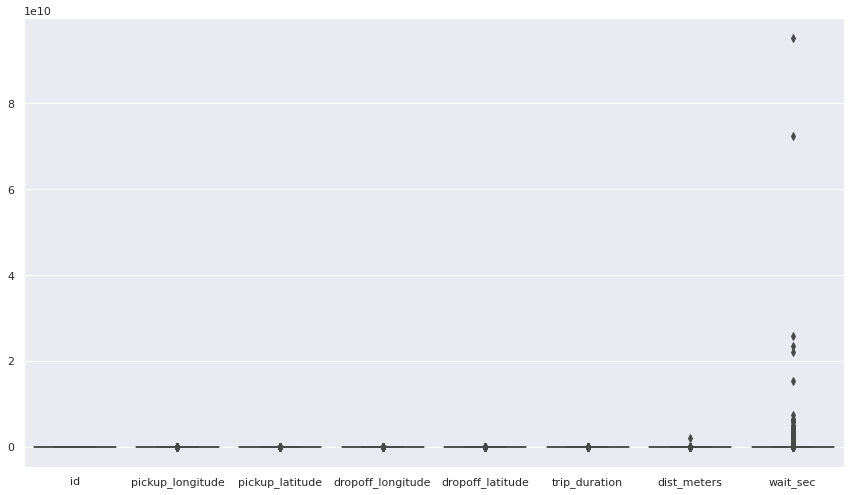

time: 493 ms (started: 2021-11-12 01:09:30 +00:00)


In [162]:
import seaborn as sns
sns.boxplot(data=quito) 


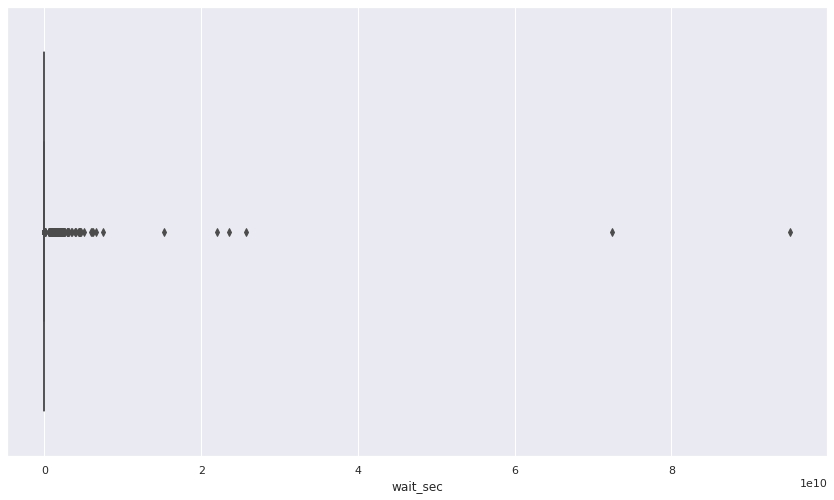

In [62]:
sns.boxplot(data=quito_df,x = quito_df['wait_sec'])  


In [63]:
quito_df.dtypes 

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
dist_meters            int64
wait_sec               int64
Pickup_year            int64
pickup_month           int64
pickup_day             int64
pickup_Hour            int64
pickup_minute          int64
dropoff_year           int64
dropoff_month          int64
dropoff_day            int64
dropoff_Hour           int64
dropoff_minute         int64
dtype: object

In [64]:
quito['pickup_longitude'] = quito['pickup_longitude'].astype('float64')

In [65]:
z = np.abs(stats.zscore(quito_df))
print(z) 

[[0.2679525  0.57493126 1.26268076 ... 0.13717682 0.93796831 1.39992183]
 [1.20782426 2.57158392 0.04721687 ... 0.25045024 1.01124081 0.19465382]
 [0.52937653 0.59625344 0.50519006 ... 0.25045024 0.36150444 0.66625191]
 ...
 [0.35084777 1.07060047 0.06269715 ... 1.269911   0.36150444 0.20710219]
 [1.34299316 0.88886083 1.28185509 ... 1.04336416 0.68637262 1.68689041]
 [1.40082866 2.00252341 1.04067854 ... 1.38318442 0.36150444 1.64194506]]


In [66]:
threshold = 3 # These are the outliers
print(np.where(z > 3)) 


(array([    8,   161,   163,   163,   168,   247,   257,   276,   576,
         636,   660,   689,   900,   995,  1047,  1048,  1050,  1096,
        1096,  1247,  1247,  1329,  1335,  1335,  1398,  1655,  1763,
        2012,  2012,  2044,  2129,  2179,  2184,  2220,  2306,  2391,
        2403,  2468,  2475,  2526,  2546,  2565,  2695,  2695,  2831,
        2893,  2893,  2893,  2907,  2927,  2933,  3109,  3114,  3114,
        3262,  3307,  3357,  3412,  3477,  3667,  3831,  3831,  3831,
        3905,  3938,  4029,  4373,  4511,  4632,  4654,  5471,  5494,
        5494,  5502,  5604,  5683,  5918,  5958,  5958,  5958,  6228,
        6228,  6228,  6228,  6279,  6279,  6279,  6279,  6334,  6486,
        6498,  6725,  6725,  7142,  7170,  7176,  7361,  7428,  7856,
        7856,  7856,  7859,  7860,  7899,  8057,  8057,  8057,  8129,
        8186,  8265,  8298,  8298,  8298,  8298,  8299,  8323,  8380,
        8667,  8669,  8682,  8953,  9029,  9090,  9285,  9293,  9293,
        9293,  9327

In [67]:
Q1 = quito_df.quantile(0.25)
Q3 = quito_df.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print()
print(Q3)
print()
print(IQR)


pickup_longitude      -78.505867
pickup_latitude        -0.218344
dropoff_longitude     -78.505734
dropoff_latitude       -0.220508
trip_duration         500.000000
dist_meters          2148.000000
wait_sec              107.000000
Pickup_year          2019.000000
pickup_month            4.000000
pickup_day              8.000000
pickup_Hour             5.000000
pickup_minute          14.000000
dropoff_year         2019.000000
dropoff_month           4.000000
dropoff_day             8.000000
dropoff_Hour            5.000000
dropoff_minute         14.000000
Name: 0.25, dtype: float64

pickup_longitude      -78.475783
pickup_latitude        -0.148715
dropoff_longitude     -78.477443
dropoff_latitude       -0.149867
trip_duration        1710.000000
dist_meters          7475.000000
wait_sec              499.000000
Pickup_year          2020.000000
pickup_month           10.000000
pickup_day             23.000000
pickup_Hour             9.000000
pickup_minute          44.000000
dropoff_year   

In [68]:
quito_df_out = quito_df[~((quito_df < (Q1 - 1.5 * IQR)) |(quito_df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [69]:
quito_df_out.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute
4,-78.521818,-0.208480,-78.504558,-0.222462,948,4625,314,2019,9,18,7,58,2019,9,18,8,14
5,-78.509202,-0.194839,-78.518764,-0.228794,1510,5820,630,2019,8,27,4,19,2019,8,27,4,44
6,-78.481542,-0.154317,-78.518420,-0.191547,1341,7593,510,2019,9,18,10,8,2019,9,18,10,31
9,-78.497122,-0.200376,-78.499757,-0.207293,109,827,29,2019,9,18,12,21,2019,9,18,12,23
10,-78.499770,-0.207324,-78.506766,-0.226037,495,2549,129,2019,9,18,12,23,2019,9,18,12,31


In [70]:
quito.shape  # Before outliers removal

(32366, 22)

In [71]:
quito_df_out.shape  # after outliers removal

(23024, 17)

In [72]:
car_list = pd.read_excel(r'/content/car_list.xlsx')
car_list.head() 

,model,year bought,transmission,mileage (kmpl),engineSize (ltrs)
0,Fiesta,2017,Automatic,15.184211,1.0
1,Focus,2018,Manual,15.184211,1.0
2,Focus,2017,Manual,15.184211,1.0
3,Fiesta,2019,Manual,10.605263,1.5
4,Fiesta,2019,Automatic,12.815789,1.0


In [73]:
petrol_price = pd.read_csv(r'/content/petrol_price.csv')
petrol_price.head()

,city,date,rate INR,state
0,Bogota,01-12-2011,73.07,Colombia
1,Bogota,01-04-2012,73.08,Colombia
2,Bogota,24-05-2012,81.44,Colombia
3,Bogota,03-06-2012,78.11,Colombia
4,Bogota,29-06-2012,74.89,Colombia


## Busiest Areas
Determine busiest areas (1km radius) in each of the cities- Bogota,Mexico City and Quito; based on pickup and drop location.

You can refer to this link in order to calculate distances: https://www.movable-type.co.uk/scripts/latlong.html


## 1. Bogota city Busy Areas

In [74]:
from geopy import distance
from math import sin, cos, sqrt, atan2, radians
from sklearn.neighbors import DistanceMetric
import numpy as np

dist = DistanceMetric.get_metric('haversine')
    


In [75]:
df1 = pd.DataFrame(bogota_df_out, columns=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'])
df1.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-74.170353,4.622699,-74.119259,4.572322
1,-74.123542,4.604075,-74.116125,4.572578
3,-74.163398,4.641949,-74.165813,4.640649
7,-74.049168,4.736697,-74.050641,4.718745
8,-74.049272,4.718333,-74.030313,4.710932


In [76]:

# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    meters = (earth_radius * 2 * np.arcsin(np.sqrt(a))) * 1000
    return meters


bogota_df_out['dist'] = \
    haversine(df1.pickup_latitude, df1.pickup_longitude,
                   df1.dropoff_latitude, df1.dropoff_longitude)


In [77]:
bogota_df_out.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute,dist
0,-74.170353,4.622699,-74.119259,4.572322,1419,11935,293,2019,9,18,1,54,2019,9,18,2,17,7965.494773
1,-74.123542,4.604075,-74.116125,4.572578,782,7101,139,2019,9,18,3,31,2019,9,18,3,44,3597.532383
3,-74.163398,4.641949,-74.165813,4.640649,66,318,52,2019,9,18,4,31,2019,9,18,4,32,304.184693
7,-74.049168,4.736697,-74.050641,4.718745,191,2458,0,2019,9,18,10,8,2019,9,18,10,11,2002.803864
8,-74.049272,4.718333,-74.030313,4.710932,308,2358,93,2019,9,18,10,11,2019,9,18,10,17,2256.462978


In [78]:
bogota_df_out['Delta_distance'] = bogota_df_out['dist_meters'] - bogota_df_out['dist'] 
bogota_df_out.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute,dist,Delta_distance
0,-74.170353,4.622699,-74.119259,4.572322,1419,11935,293,2019,9,18,1,54,2019,9,18,2,17,7965.494773,3969.505227
1,-74.123542,4.604075,-74.116125,4.572578,782,7101,139,2019,9,18,3,31,2019,9,18,3,44,3597.532383,3503.467617
3,-74.163398,4.641949,-74.165813,4.640649,66,318,52,2019,9,18,4,31,2019,9,18,4,32,304.184693,13.815307
7,-74.049168,4.736697,-74.050641,4.718745,191,2458,0,2019,9,18,10,8,2019,9,18,10,11,2002.803864,455.196136
8,-74.049272,4.718333,-74.030313,4.710932,308,2358,93,2019,9,18,10,11,2019,9,18,10,17,2256.462978,101.537022


In [79]:
bogota_busyAreas = bogota_df_out.nlargest(10,['Delta_distance'])
bogota_busyAreas

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute,dist,Delta_distance
2729,-74.070958,4.704658,-74.070988,4.704724,8168,22728,1818,2020,6,28,11,7,2020,6,28,1,24,8.124524,22719.875476
2388,-74.065986,4.649030,-74.066657,4.649164,3941,21940,828,2020,5,26,10,42,2020,5,26,11,48,75.786357,21864.213643
1163,-74.051074,4.752220,-74.050869,4.752109,2867,21759,778,2019,10,14,9,4,2019,10,14,9,52,25.841140,21733.158860
2659,-74.066776,4.649436,-74.066373,4.649103,5687,21454,920,2020,6,16,9,41,2020,6,16,11,16,57.978326,21396.021674
2521,-74.049487,4.761140,-74.048468,4.760454,3883,19889,1020,2019,10,12,3,38,2019,10,12,4,42,136.166567,19752.833433
855,-74.049758,4.752821,-74.043398,4.762390,3893,20803,1516,2019,9,22,8,50,2019,9,22,9,55,1276.310141,19526.689859
2439,-74.071044,4.704776,-74.070889,4.704461,3215,19193,1301,2020,1,19,3,46,2020,1,19,4,40,38.989794,19154.010206
2106,-74.027468,4.767062,-74.026339,4.762385,5235,19304,1871,2020,3,22,3,44,2020,3,22,5,11,534.971138,18769.028862
1617,-74.135686,4.716154,-74.135786,4.716266,3000,18087,911,2019,12,28,12,39,2019,12,28,1,29,16.686337,18070.313663
636,-74.050817,4.752303,-74.050946,4.752125,4190,17761,1572,2019,10,28,7,4,2019,10,28,8,14,24.406739,17736.593261


In [80]:
pip install reverse_geocoder 

In [81]:
pip install ipython-autotime


In [82]:
!pip install geopandas


In [83]:
# import module
from geopy.geocoders import Nominatim
# initialize Nominatim API
# geolocator = Nominatim(user_agent="geoapiExercises")
# import reverse_geocoder as rg


In [84]:
import pandas as pd
import geopy
import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import tqdm
from tqdm._tqdm_notebook import tqdm_notebook


In [85]:
locator = Nominatim(user_agent='myGeocoder')
%load_ext autotime


time: 189 µs (started: 2021-11-12 00:54:30 +00:00)


In [86]:
bogota_busyAreas.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute,dist,Delta_distance
2729,-74.070958,4.704658,-74.070988,4.704724,8168,22728,1818,2020,6,28,11,7,2020,6,28,1,24,8.124524,22719.875476
2388,-74.065986,4.649030,-74.066657,4.649164,3941,21940,828,2020,5,26,10,42,2020,5,26,11,48,75.786357,21864.213643
1163,-74.051074,4.752220,-74.050869,4.752109,2867,21759,778,2019,10,14,9,4,2019,10,14,9,52,25.841140,21733.158860
2659,-74.066776,4.649436,-74.066373,4.649103,5687,21454,920,2020,6,16,9,41,2020,6,16,11,16,57.978326,21396.021674
2521,-74.049487,4.761140,-74.048468,4.760454,3883,19889,1020,2019,10,12,3,38,2019,10,12,4,42,136.166567,19752.833433


time: 48.3 ms (started: 2021-11-12 00:54:30 +00:00)


In [87]:
pip install geocoder 

time: 3.14 s (started: 2021-11-12 00:54:30 +00:00)


In [88]:
import geocoder

def geo_rev(x):
    g = geocoder.osm([x.pickup_latitude, x.pickup_longitude], method='reverse').json
    if g:
        return g.get('address')
    else:
        return 'no country'

bogota_busyAreas['pickup_address1'] = bogota_busyAreas[['pickup_latitude', 'pickup_longitude']].apply(geo_rev, axis=1)


time: 4.82 s (started: 2021-11-12 00:54:34 +00:00)


In [89]:
def geo_rev(x):
    g = geocoder.osm([x.dropoff_latitude, x.dropoff_longitude], method='reverse').json
    if g:
        return g.get('address')
    else:
        return 'no country'

bogota_busyAreas['dropoff_address2'] = bogota_busyAreas[['dropoff_latitude', 'dropoff_longitude']].apply(geo_rev, axis=1)


time: 4.98 s (started: 2021-11-12 00:54:38 +00:00)


In [90]:
bogota_busyAreas

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute,dist,Delta_distance,pickup_address1,dropoff_address2
2729,-74.070958,4.704658,-74.070988,4.704724,8168,22728,1818,2020,6,28,11,7,2020,6,28,1,24,8.124524,22719.875476,"Librería San Pablo, Transversal 60, UPZ Niza, ...","Librería San Pablo, Transversal 60, UPZ Niza, ..."
2388,-74.065986,4.649030,-74.066657,4.649164,3941,21940,828,2020,5,26,10,42,2020,5,26,11,48,75.786357,21864.213643,"Nevada suites, Calle 61A, San Luis, UPZ Galerí...","Nevada suites, Calle 61A, San Luis, UPZ Galerí..."
1163,-74.051074,4.752220,-74.050869,4.752109,2867,21759,778,2019,10,14,9,4,2019,10,14,9,52,25.841140,21733.158860,"Alimentador (2.7 San Jose), Avenida Calle 170,...","Alimentador (2.7 San Jose), Avenida Calle 170,..."
2659,-74.066776,4.649436,-74.066373,4.649103,5687,21454,920,2020,6,16,9,41,2020,6,16,11,16,57.978326,21396.021674,"Jesuscristo es la Señor Universal, Carrera 16,...","Nevada suites, Calle 61A, San Luis, UPZ Galerí..."
2521,-74.049487,4.761140,-74.048468,4.760454,3883,19889,1020,2019,10,12,3,38,2019,10,12,4,42,136.166567,19752.833433,"Patio Portal Norte, Calle 182, Nueva Zelandia,...","Carrera 50C, Aticos De La Sabana 2, Localidad ..."
855,-74.049758,4.752821,-74.043398,4.762390,3893,20803,1516,2019,9,22,8,50,2019,9,22,9,55,1276.310141,19526.689859,"Domino's, Carrera 49B, Nueva Zelandia, UPZ San...","Carrera 23 Bis, Maranta, UPZ Verbenal, Localid..."
2439,-74.071044,4.704776,-74.070889,4.704461,3215,19193,1301,2020,1,19,3,46,2020,1,19,4,40,38.989794,19154.010206,"Kmila Sarz Peluquería, Transversal 60, UPZ Niz...","Max International, Transversal 60, UPZ Niza, L..."
2106,-74.027468,4.767062,-74.026339,4.762385,5235,19304,1871,2020,3,22,3,44,2020,3,22,5,11,534.971138,18769.028862,"Terpel, Avenida Carrera 7, UPZ Verbenal, Local...","Carrera 6B, Tibabita, UPZ Verbenal, Localidad ..."
1617,-74.135686,4.716154,-74.135786,4.716266,3000,18087,911,2019,12,28,12,39,2019,12,28,1,29,16.686337,18070.313663,"Carrera 119A, La Faena, UPZ Engativá, Localida...","Carrera 119A, La Faena, UPZ Engativá, Localida..."
636,-74.050817,4.752303,-74.050946,4.752125,4190,17761,1572,2019,10,28,7,4,2019,10,28,8,14,24.406739,17736.593261,"Alimentador (2.7 San Jose), Avenida Calle 170,...","Alimentador (2.7 San Jose), Avenida Calle 170,..."


time: 47.2 ms (started: 2021-11-12 00:54:43 +00:00)


In [91]:
Busy_area_names1 = [x for x in bogota_busyAreas.pickup_address1]
Busy_area_names2 = [x for x in bogota_busyAreas.dropoff_address2]

time: 2.53 ms (started: 2021-11-12 00:54:43 +00:00)


In [92]:
print(Busy_area_names1 ,'+',Busy_area_names2,)


['Librería San Pablo, Transversal 60, UPZ Niza, Localidad Suba, Bogotá, Bogotá Distrito Capital, 111121, Colombia', 'Nevada suites, Calle 61A, San Luis, UPZ Galerías, Localidad Teusaquillo, Bogotá, Bogotá Distrito Capital, 111311, Colombia', 'Alimentador (2.7 San Jose), Avenida Calle 170, UPZ Britalia, Localidad Suba, Bogotá, Bogotá Distrito Capital, 111156, Colombia', 'Jesuscristo es la Señor Universal, Carrera 16, San Luis, UPZ Galerías, Localidad Teusaquillo, Bogotá, Bogotá Distrito Capital, 111311, Colombia', 'Patio Portal Norte, Calle 182, Nueva Zelandia, UPZ San José de Bavaria, Localidad Suba, Bogotá, Bogotá Distrito Capital, 111166, Colombia', "Domino's, Carrera 49B, Nueva Zelandia, UPZ San José de Bavaria, Localidad Suba, Bogotá, Bogotá Distrito Capital, 111166, Colombia", 'Kmila Sarz Peluquería, Transversal 60, UPZ Niza, Localidad Suba, Bogotá, Bogotá Distrito Capital, 111121, Colombia', 'Terpel, Avenida Carrera 7, UPZ Verbenal, Localidad Usaquén, Bogotá, Bogotá Distrito Capi

## 2) Mexico City Busy Areas 

In [93]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    meters = (earth_radius * 2 * np.arcsin(np.sqrt(a))) * 1000
    return meters


mexico_df_out['dist'] = \
    haversine(mexico_df_out.pickup_latitude, mexico_df_out.pickup_longitude,
                   mexico_df_out.dropoff_latitude, mexico_df_out.dropoff_longitude)


time: 17.3 ms (started: 2021-11-12 00:54:44 +00:00)


In [94]:
mexico_df_out

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute,dist
2,-99.289603,19.326263,-99.271874,19.328530,681,2848,129,2019,9,18,10,11,2019,9,18,10,23,1877.313238
3,-99.271161,19.328875,-99.279900,19.326256,436,1409,106,2019,9,18,10,23,2019,9,18,10,30,962.103615
4,-99.282761,19.326944,-99.291705,19.322754,442,1567,85,2019,9,18,10,44,2019,9,18,10,51,1047.844913
5,-99.289712,19.322929,-99.289280,19.325978,100,797,19,2019,9,18,10,58,2019,9,18,10,59,342.069774
6,-99.285391,19.326247,-99.282549,19.328117,345,676,169,2019,9,18,11,0,2019,9,18,11,5,363.599858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12687,-99.202185,19.376042,-99.193756,19.388496,252,2280,33,2019,10,27,8,11,2019,10,27,8,15,1642.979958
12689,-99.180762,19.369210,-99.180013,19.370270,3846,8261,427,2019,10,27,9,10,2019,10,27,10,14,141.682546
12690,-99.059582,19.307219,-99.065798,19.306472,518,2498,115,2019,10,27,10,53,2019,10,27,11,1,657.571766
12691,-99.170637,19.283637,-99.178194,19.280982,1131,6051,228,2019,10,27,11,19,2019,10,27,11,38,846.351139


time: 47.8 ms (started: 2021-11-12 00:54:44 +00:00)


In [95]:
mexico_df_out['Delta_distance'] = mexico_df_out['dist_meters'] - mexico_df_out['dist'] 
mexico_df_out.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute,dist,Delta_distance
2,-99.289603,19.326263,-99.271874,19.328530,681,2848,129,2019,9,18,10,11,2019,9,18,10,23,1877.313238,970.686762
3,-99.271161,19.328875,-99.279900,19.326256,436,1409,106,2019,9,18,10,23,2019,9,18,10,30,962.103615,446.896385
4,-99.282761,19.326944,-99.291705,19.322754,442,1567,85,2019,9,18,10,44,2019,9,18,10,51,1047.844913,519.155087
5,-99.289712,19.322929,-99.289280,19.325978,100,797,19,2019,9,18,10,58,2019,9,18,10,59,342.069774,454.930226
6,-99.285391,19.326247,-99.282549,19.328117,345,676,169,2019,9,18,11,0,2019,9,18,11,5,363.599858,312.400142


time: 51.3 ms (started: 2021-11-12 00:54:44 +00:00)


In [96]:
mexico_busyAreas = mexico_df_out.nlargest(10,['Delta_distance'])
mexico_busyAreas

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute,dist,Delta_distance
5798,-99.063179,19.354725,-99.062817,19.356430,2652,17031,732,2019,12,29,7,42,2019,12,29,8,26,193.393447,16837.606553
5457,-99.125798,19.424498,-99.129366,19.429291,4461,17398,882,2019,12,13,5,5,2019,12,13,6,20,651.160968,16746.839032
9720,-99.175671,19.372462,-99.179091,19.370159,2529,17126,891,2019,10,12,1,41,2019,10,12,2,23,440.763302,16685.236698
6987,-99.181337,19.370107,-99.175969,19.363725,1763,17335,493,2020,1,25,3,6,2020,1,25,3,36,905.938509,16429.061491
11257,-99.094086,19.477633,-99.107261,19.478733,3151,17734,52,2020,3,7,7,2,2020,3,7,7,54,1386.581828,16347.418172
6956,-99.264105,19.331138,-99.264060,19.331467,2584,16308,394,2020,6,16,11,40,2020,6,16,12,23,36.906667,16271.093333
4445,-99.068696,19.330669,-99.077196,19.323025,3453,17492,871,2019,1,12,1,50,2019,1,12,2,47,1231.987450,16260.012550
7619,-99.061977,19.359320,-99.061962,19.359488,3347,16276,1151,2020,8,2,8,20,2020,8,2,9,16,18.815782,16257.184218
3960,-99.105069,19.481756,-99.093688,19.479645,4904,17337,84,2020,12,5,6,22,2020,12,5,7,44,1215.952160,16121.047840
6702,-99.203075,19.381140,-99.200984,19.382112,4257,16203,617,2019,12,8,7,45,2019,12,8,8,56,244.519516,15958.480484


time: 52.9 ms (started: 2021-11-12 00:54:44 +00:00)


In [97]:
def geo_rev(x):
    g = geocoder.osm([x.pickup_latitude, x.pickup_longitude], method='reverse').json
    if g:
        return g.get('address')
    else:
        return 'no country'

mexico_busyAreas['pickup_address1'] = mexico_busyAreas[['pickup_latitude', 'pickup_longitude']].apply(geo_rev, axis=1)


time: 4.8 s (started: 2021-11-12 00:54:44 +00:00)


In [98]:
def geo_rev(x):
    g = geocoder.osm([x.dropoff_latitude, x.dropoff_longitude], method='reverse').json
    if g:
        return g.get('address')
    else:
        return 'no country'

mexico_busyAreas['dropoff_address2'] = mexico_busyAreas[['dropoff_latitude', 'dropoff_longitude']].apply(geo_rev, axis=1)


time: 4.99 s (started: 2021-11-12 00:54:49 +00:00)


In [99]:
mexico_busyAreas.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute,dist,Delta_distance,pickup_address1,dropoff_address2
5798,-99.063179,19.354725,-99.062817,19.356430,2652,17031,732,2019,12,29,7,42,2019,12,29,8,26,193.393447,16837.606553,"Calle Universidad, Unidad Habitacional Plutarc...","3, Calle Universidad, Unidad Habitacional Plut..."
5457,-99.125798,19.424498,-99.129366,19.429291,4461,17398,882,2019,12,13,5,5,2019,12,13,6,20,651.160968,16746.839032,"Merced, Anillo de Circunvalación, Unidad Cande...","Calle las Cruces, Centro Urbano, Cuauhtémoc, C..."
9720,-99.175671,19.372462,-99.179091,19.370159,2529,17126,891,2019,10,12,1,41,2019,10,12,2,23,440.763302,16685.236698,"301, Félix Cuevas, Centro Urbano Presidente Al...","Calle Tigre, Actipan, Ciudad de México, 03230,..."
6987,-99.181337,19.370107,-99.175969,19.363725,1763,17335,493,2020,1,25,3,6,2020,1,25,3,36,905.938509,16429.061491,"34, Calle Murcia, Colonia Insurgentes Mixcoac,...","206, Avenida Río Mixcoac, Colonia Acacias, Ben..."
11257,-99.094086,19.477633,-99.107261,19.478733,3151,17734,52,2020,3,7,7,2,2020,3,7,7,54,1386.581828,16347.418172,"Frente a Office Depot, Calzada San Juan de Ara...","Calle Pelícano, Colonia Ampliación San Juan de..."


time: 52.2 ms (started: 2021-11-12 00:54:54 +00:00)


In [100]:
Busy_area_names3 = [x for x in mexico_busyAreas.pickup_address1]
Busy_area_names4 = [x for x in mexico_busyAreas.dropoff_address2]

time: 2.83 ms (started: 2021-11-12 00:54:54 +00:00)


In [101]:
print(Busy_area_names1 ,'+',Busy_area_names2,)


['Librería San Pablo, Transversal 60, UPZ Niza, Localidad Suba, Bogotá, Bogotá Distrito Capital, 111121, Colombia', 'Nevada suites, Calle 61A, San Luis, UPZ Galerías, Localidad Teusaquillo, Bogotá, Bogotá Distrito Capital, 111311, Colombia', 'Alimentador (2.7 San Jose), Avenida Calle 170, UPZ Britalia, Localidad Suba, Bogotá, Bogotá Distrito Capital, 111156, Colombia', 'Jesuscristo es la Señor Universal, Carrera 16, San Luis, UPZ Galerías, Localidad Teusaquillo, Bogotá, Bogotá Distrito Capital, 111311, Colombia', 'Patio Portal Norte, Calle 182, Nueva Zelandia, UPZ San José de Bavaria, Localidad Suba, Bogotá, Bogotá Distrito Capital, 111166, Colombia', "Domino's, Carrera 49B, Nueva Zelandia, UPZ San José de Bavaria, Localidad Suba, Bogotá, Bogotá Distrito Capital, 111166, Colombia", 'Kmila Sarz Peluquería, Transversal 60, UPZ Niza, Localidad Suba, Bogotá, Bogotá Distrito Capital, 111121, Colombia', 'Terpel, Avenida Carrera 7, UPZ Verbenal, Localidad Usaquén, Bogotá, Bogotá Distrito Capi

## 3) Quito City Busy Areas

In [102]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    meters = (earth_radius * 2 * np.arcsin(np.sqrt(a))) * 1000
    return meters


quito_df_out['dist'] = \
    haversine(quito_df_out.pickup_latitude, quito_df_out.pickup_longitude,
                   quito_df_out.dropoff_latitude, quito_df_out.dropoff_longitude)


time: 19.6 ms (started: 2021-11-12 00:54:54 +00:00)


In [103]:
quito_df_out

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute,dist
4,-78.521818,-0.208480,-78.504558,-0.222462,948,4625,314,2019,9,18,7,58,2019,9,18,8,14,2470.005918
5,-78.509202,-0.194839,-78.518764,-0.228794,1510,5820,630,2019,8,27,4,19,2019,8,27,4,44,3922.541858
6,-78.481542,-0.154317,-78.518420,-0.191547,1341,7593,510,2019,9,18,10,8,2019,9,18,10,31,5826.980604
9,-78.497122,-0.200376,-78.499757,-0.207293,109,827,29,2019,9,18,12,21,2019,9,18,12,23,823.075648
10,-78.499770,-0.207324,-78.506766,-0.226037,495,2549,129,2019,9,18,12,23,2019,9,18,12,31,2221.353695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32354,-78.485572,-0.175184,-78.481642,-0.131266,1262,5640,490,2019,10,27,7,7,2019,10,27,7,28,4902.968544
32355,-78.479990,-0.180065,-78.480127,-0.200695,1620,5890,765,2019,10,27,7,16,2019,10,27,7,43,2293.992238
32356,-78.478655,-0.202216,-78.492082,-0.206812,788,3031,329,2019,10,27,7,44,2019,10,27,7,57,1578.124611
32357,-78.486512,-0.202303,-78.479049,-0.185181,375,2114,159,2019,10,27,8,1,2019,10,27,8,8,2076.932932


time: 45.9 ms (started: 2021-11-12 00:54:54 +00:00)


In [104]:
quito_df_out['Delta_distance'] = quito_df_out['dist_meters'] - quito_df_out['dist'] 
quito_df_out.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute,dist,Delta_distance
4,-78.521818,-0.208480,-78.504558,-0.222462,948,4625,314,2019,9,18,7,58,2019,9,18,8,14,2470.005918,2154.994082
5,-78.509202,-0.194839,-78.518764,-0.228794,1510,5820,630,2019,8,27,4,19,2019,8,27,4,44,3922.541858,1897.458142
6,-78.481542,-0.154317,-78.518420,-0.191547,1341,7593,510,2019,9,18,10,8,2019,9,18,10,31,5826.980604,1766.019396
9,-78.497122,-0.200376,-78.499757,-0.207293,109,827,29,2019,9,18,12,21,2019,9,18,12,23,823.075648,3.924352
10,-78.499770,-0.207324,-78.506766,-0.226037,495,2549,129,2019,9,18,12,23,2019,9,18,12,31,2221.353695,327.646305


time: 41.9 ms (started: 2021-11-12 00:54:54 +00:00)


In [105]:
quito_busyAeas = quito_df_out.nlargest(10,['Delta_distance'])
quito_busyAeas

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute,dist,Delta_distance
27979,-78.457097,-0.096579,-78.457246,-0.096576,1864,15305,460,2020,6,18,12,5,2020,6,18,12,36,16.478087,15288.521913
30829,-78.503934,-0.145286,-78.505168,-0.145493,2389,15280,1042,2019,8,29,8,38,2019,8,29,9,18,139.202326,15140.797674
27274,-78.508343,-0.237062,-78.506877,-0.237520,1626,14988,319,2019,8,17,10,15,2019,8,17,10,42,170.770977,14817.229023
30988,-78.459172,-0.162661,-78.459102,-0.162488,2636,14825,935,2020,3,4,4,30,2020,3,4,5,14,20.710883,14804.289117
13896,-78.492024,-0.204980,-78.492088,-0.204737,1934,14670,588,2019,8,16,11,25,2019,8,16,11,57,27.916607,14642.083393
25921,-78.444587,-0.109477,-78.445720,-0.115313,2031,15271,670,2020,1,22,10,10,2020,1,22,10,44,661.075048,14609.924952
18514,-78.486497,-0.180290,-78.485622,-0.177408,2405,14833,719,2019,11,20,1,46,2019,11,20,2,26,334.844701,14498.155299
1689,-78.458712,-0.104561,-78.458702,-0.104400,2153,14501,368,2020,1,4,7,11,2020,1,4,7,47,17.870937,14483.129063
30121,-78.459041,-0.097474,-78.453213,-0.098216,2378,15084,483,2020,9,7,9,18,2020,9,7,9,57,653.296077,14430.703923
28616,-78.478095,-0.148695,-78.484058,-0.150733,2639,15102,1027,2020,6,23,12,33,2020,6,23,1,17,700.724040,14401.275960


time: 47.1 ms (started: 2021-11-12 00:54:54 +00:00)


In [106]:
def geo_rev(x):
    g = geocoder.osm([x.pickup_latitude, x.pickup_longitude], method='reverse').json
    if g:
        return g.get('address')
    else:
        return 'no country'

quito_busyAeas['pickup_address1'] = quito_busyAeas[['pickup_latitude', 'pickup_longitude']].apply(geo_rev, axis=1)


time: 4.82 s (started: 2021-11-12 00:54:54 +00:00)


In [107]:
def geo_rev(x):
    g = geocoder.osm([x.dropoff_latitude, x.dropoff_longitude], method='reverse').json
    if g:
        return g.get('address')
    else:
        return 'no country'

quito_busyAeas['dropoff_address2'] = quito_busyAeas[['dropoff_latitude', 'dropoff_longitude']].apply(geo_rev, axis=1)


time: 4.98 s (started: 2021-11-12 00:54:59 +00:00)


In [108]:
quito_busyAeas.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute,dist,Delta_distance,pickup_address1,dropoff_address2
27979,-78.457097,-0.096579,-78.457246,-0.096576,1864,15305,460,2020,6,18,12,5,2020,6,18,12,36,16.478087,15288.521913,"N76, Camino De Los Eucaliptos, Carcelén, Carap...","N76, Camino De Los Eucaliptos, Carcelén, Carap..."
30829,-78.503934,-0.145286,-78.505168,-0.145493,2389,15280,1042,2019,8,29,8,38,2019,8,29,9,18,139.202326,15140.797674,"Israel, Antonio Román, Pinar Alto, Cochapamba,...","Antonio Román, Pinar Alto, Cochapamba, Quito, ..."
27274,-78.508343,-0.237062,-78.506877,-0.237520,1626,14988,319,2019,8,17,10,15,2019,8,17,10,42,170.770977,14817.229023,"Petroecuador, Avenida Napo, Chimbacalle, Quito...","Novedades Marimar, Pedro Pinto Guzman, Pio XII..."
30988,-78.459172,-0.162661,-78.459102,-0.162488,2636,14825,935,2020,3,4,4,30,2020,3,4,5,14,20.710883,14804.289117,"UDLA Park, Avenida Simón Bolívar, Gabriela Mar...","UDLAPARK, Nuestra Señora de Santa Ana, El Bata..."
13896,-78.492024,-0.204980,-78.492088,-0.204737,1934,14670,588,2019,8,16,11,25,2019,8,16,11,57,27.916607,14642.083393,"Hotel Lafayette, Baquedano, Mariscal Sucre, Qu...","Hotel Lafayette, Baquedano, Mariscal Sucre, Qu..."


time: 42.4 ms (started: 2021-11-12 00:55:04 +00:00)


In [109]:
Busy_area_names5 = [x for x in quito_busyAeas.pickup_address1]
Busy_area_names6 = [x for x in quito_busyAeas.dropoff_address2]


time: 2.47 ms (started: 2021-11-12 00:55:04 +00:00)


In [110]:
print(Busy_area_names1 ,'+',Busy_area_names2,)


['Librería San Pablo, Transversal 60, UPZ Niza, Localidad Suba, Bogotá, Bogotá Distrito Capital, 111121, Colombia', 'Nevada suites, Calle 61A, San Luis, UPZ Galerías, Localidad Teusaquillo, Bogotá, Bogotá Distrito Capital, 111311, Colombia', 'Alimentador (2.7 San Jose), Avenida Calle 170, UPZ Britalia, Localidad Suba, Bogotá, Bogotá Distrito Capital, 111156, Colombia', 'Jesuscristo es la Señor Universal, Carrera 16, San Luis, UPZ Galerías, Localidad Teusaquillo, Bogotá, Bogotá Distrito Capital, 111311, Colombia', 'Patio Portal Norte, Calle 182, Nueva Zelandia, UPZ San José de Bavaria, Localidad Suba, Bogotá, Bogotá Distrito Capital, 111166, Colombia', "Domino's, Carrera 49B, Nueva Zelandia, UPZ San José de Bavaria, Localidad Suba, Bogotá, Bogotá Distrito Capital, 111166, Colombia", 'Kmila Sarz Peluquería, Transversal 60, UPZ Niza, Localidad Suba, Bogotá, Bogotá Distrito Capital, 111121, Colombia', 'Terpel, Avenida Carrera 7, UPZ Verbenal, Localidad Usaquén, Bogotá, Bogotá Distrito Capi

In [111]:
# Note: 
## Top 10 busy areas.
## distance delta is the difference between the actual distance between the locations and the cab travel distance, so that these huge difference of top 10 columns tells us the cab took extra journey so busy areas.
## top 10 colum

time: 1.42 ms (started: 2021-11-12 00:55:04 +00:00)


# Note: 
## 1) All the above are Top 10 busy areas of bogota, mexico, quito cities
## 2) distance delta is the difference between the actual distance between the locations and the cab travel distance, so  these huge difference of top 10 columns tells us the cab took extra journey so busy areas.
## 3) I have taken top 10 busy areas through sort_out 
## 4) The reason for Travel time features are not considered because this particular problem starting itself was insisted to find busy areas through pickup and dropoff locations

## Minimum Price
What should be the minimum price the cab driver should charge per km in each of the cities to break even?

In [112]:
car_list.head()

,model,year bought,transmission,mileage (kmpl),engineSize (ltrs)
0,Fiesta,2017,Automatic,15.184211,1.0
1,Focus,2018,Manual,15.184211,1.0
2,Focus,2017,Manual,15.184211,1.0
3,Fiesta,2019,Manual,10.605263,1.5
4,Fiesta,2019,Automatic,12.815789,1.0


time: 26.7 ms (started: 2021-11-12 00:55:04 +00:00)


In [113]:
car_list['engineSize (ltrs)'].value_counts()

1.0    24
2.0     7
1.5     5
1.2     4
1.1     2
1.6     1
Name: engineSize (ltrs), dtype: int64

time: 7.39 ms (started: 2021-11-12 00:55:04 +00:00)


In [114]:
car_list['transmission'].value_counts()

Manual       38
Semi-Auto     3
Automatic     2
Name: transmission, dtype: int64

time: 7.65 ms (started: 2021-11-12 00:55:04 +00:00)


### We can also observe that most cars of  engine sizes '1.0' and Manual transmission cars.

In [115]:
car_list[['engineSize (ltrs)','model']].groupby('engineSize (ltrs)').count()

,model
engineSize (ltrs),
1.0,24
1.1,2
1.2,4
1.5,5
1.6,1
2.0,7


time: 18.9 ms (started: 2021-11-12 00:55:04 +00:00)


In [116]:
car_list['model'].value_counts()

 Fiesta      25
 Focus        7
 Kuga         5
 EcoSport     2
 Puma         1
 C-MAX        1
 Ka+          1
 Mondeo       1
Name: model, dtype: int64

time: 6.99 ms (started: 2021-11-12 00:55:04 +00:00)


In [117]:
models_mileage = car_list.groupby(['model'])['mileage (kmpl)'].mean()
models_mileage

model
 C-MAX       18.131579
 EcoSport    14.157895
 Fiesta      15.429474
 Focus       14.819549
 Ka+         15.184211
 Kuga        13.705263
 Mondeo      17.289474
 Puma        13.263158
Name: mileage (kmpl), dtype: float64

time: 10.2 ms (started: 2021-11-12 00:55:04 +00:00)


In [118]:
models_average = models_mileage.mean()
models_average

15.247575187969925

time: 5.54 ms (started: 2021-11-12 00:55:04 +00:00)


In [119]:
mileage = car_list[['engineSize (ltrs)','mileage (kmpl)']].groupby('engineSize (ltrs)').mean()
mileage

,mileage (kmpl)
engineSize (ltrs),
1.0,15.646930
1.1,13.697368
1.2,14.513158
1.5,16.889474
1.6,12.605263
2.0,13.165414


time: 22.2 ms (started: 2021-11-12 00:55:04 +00:00)


In [120]:
# average mileage of all engine size cars
from functools import reduce
average_mileage = [x for x in mileage['mileage (kmpl)']]
average_mileage = reduce(lambda a, b: a + b, average_mileage) / len(average_mileage)
average_mileage

14.419601086048454

time: 6.94 ms (started: 2021-11-12 00:55:04 +00:00)


### As if we observe, All enginesize has very nearby mileage(kmpl) so even for the llumni Business profit sake if we  take the  lowest or average of mileage per kilometer, then it would be 14.41 kmpl mileage. 
### All models average mileage is 15 kmpl
### All cars can engines can give  an average of 14 kmpl mileage.
### So Average mileage of all cars in cities is 14.5 kmpl


In [121]:
petrol_price.head()

,city,date,rate INR,state
0,Bogota,01-12-2011,73.07,Colombia
1,Bogota,01-04-2012,73.08,Colombia
2,Bogota,24-05-2012,81.44,Colombia
3,Bogota,03-06-2012,78.11,Colombia
4,Bogota,29-06-2012,74.89,Colombia


time: 21.7 ms (started: 2021-11-12 00:55:04 +00:00)


In [122]:
# The average fuel prices of all time frames for each city
petrol_price[['city','rate INR']].groupby('city').mean()

,rate INR
city,
Bogota,77.859420
Mexico city,76.098752
Quito,72.211509


time: 16.3 ms (started: 2021-11-12 00:55:04 +00:00)


In [123]:
# The individual city average petrol price multiply of mileage kmpl 
Bogota = 77.85 * 14.5 
Mexico = 76.09 * 14.5
Quito = 72.21  * 14.5

time: 1.17 ms (started: 2021-11-12 00:55:04 +00:00)


In [124]:
# The Total cost  for 14.5 kilometers
print("The total cost in bogota is :", Bogota)
print('The total cost in Mexico is :', Mexico)
print('The total cost in Quito is :', Quito)

The total cost in bogota is : 1128.8249999999998
The total cost in Mexico is : 1103.305
The total cost in Quito is : 1047.0449999999998
time: 2.44 ms (started: 2021-11-12 00:55:04 +00:00)


In [125]:
# minimum cost per kilometer 
cost_in_Bogota = Bogota/14.5
cost_in_Mexico = Mexico/14.5
cost_in_Quito = Quito/14.5
print("The min cost in bogota is :", cost_in_Bogota)
print('The min cost in Mexico is :', cost_in_Mexico)
print('The min cost in Quito is :', cost_in_Quito)

The min cost in bogota is : 77.85
The min cost in Mexico is : 76.09
The min cost in Quito is : 72.21
time: 8.78 ms (started: 2021-11-12 00:55:04 +00:00)


## Optimum Price
Since there is a waiting time (time between cab booked and trip started) for the cab to arrive at a specific location, Ilumin wants to pay the cab driver during such time. What should be the optimal price paid per min?

In [126]:
bogota_df_out.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute,dist,Delta_distance
0,-74.170353,4.622699,-74.119259,4.572322,1419,11935,293,2019,9,18,1,54,2019,9,18,2,17,7965.494773,3969.505227
1,-74.123542,4.604075,-74.116125,4.572578,782,7101,139,2019,9,18,3,31,2019,9,18,3,44,3597.532383,3503.467617
3,-74.163398,4.641949,-74.165813,4.640649,66,318,52,2019,9,18,4,31,2019,9,18,4,32,304.184693,13.815307
7,-74.049168,4.736697,-74.050641,4.718745,191,2458,0,2019,9,18,10,8,2019,9,18,10,11,2002.803864,455.196136
8,-74.049272,4.718333,-74.030313,4.710932,308,2358,93,2019,9,18,10,11,2019,9,18,10,17,2256.462978,101.537022


time: 61.7 ms (started: 2021-11-12 00:55:04 +00:00)


In [127]:
#  converting distance in  meters to kilometers
bogota_df_out['dist_meters'] = bogota_df_out['dist_meters'] / 1000

time: 4.89 ms (started: 2021-11-12 00:55:04 +00:00)


In [128]:
mexico_df_out['dist_meters'] = mexico_df_out['dist_meters'] / 1000


time: 3.82 ms (started: 2021-11-12 00:55:04 +00:00)


In [129]:
quito_df_out['dist_meters'] = quito_df_out['dist_meters'] / 1000


time: 6.67 ms (started: 2021-11-12 00:55:04 +00:00)


In [130]:
bogota_df_out['Trip_cost'] = bogota_df_out['dist_meters'] * 77.85 # mean cost of petrol in bogota

time: 3.57 ms (started: 2021-11-12 00:55:04 +00:00)


In [131]:
mexico_df_out['Trip_cost'] = mexico_df_out['dist_meters'] * 76.09 # mean cost of petrol in mexico
quito_df_out['Trip_cost'] = quito_df_out['dist_meters'] * 72.21 # mean cost of petrol in quito

time: 8.67 ms (started: 2021-11-12 00:55:04 +00:00)


In [132]:
bogota_df_out.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute,dist,Delta_distance,Trip_cost
0,-74.170353,4.622699,-74.119259,4.572322,1419,11.935,293,2019,9,18,1,54,2019,9,18,2,17,7965.494773,3969.505227,929.13975
1,-74.123542,4.604075,-74.116125,4.572578,782,7.101,139,2019,9,18,3,31,2019,9,18,3,44,3597.532383,3503.467617,552.81285
3,-74.163398,4.641949,-74.165813,4.640649,66,0.318,52,2019,9,18,4,31,2019,9,18,4,32,304.184693,13.815307,24.75630
7,-74.049168,4.736697,-74.050641,4.718745,191,2.458,0,2019,9,18,10,8,2019,9,18,10,11,2002.803864,455.196136,191.35530
8,-74.049272,4.718333,-74.030313,4.710932,308,2.358,93,2019,9,18,10,11,2019,9,18,10,17,2256.462978,101.537022,183.57030


time: 55.6 ms (started: 2021-11-12 00:55:04 +00:00)


In [133]:
mexico_df_out.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute,dist,Delta_distance,Trip_cost
2,-99.289603,19.326263,-99.271874,19.328530,681,2.848,129,2019,9,18,10,11,2019,9,18,10,23,1877.313238,970.686762,216.70432
3,-99.271161,19.328875,-99.279900,19.326256,436,1.409,106,2019,9,18,10,23,2019,9,18,10,30,962.103615,446.896385,107.21081
4,-99.282761,19.326944,-99.291705,19.322754,442,1.567,85,2019,9,18,10,44,2019,9,18,10,51,1047.844913,519.155087,119.23303
5,-99.289712,19.322929,-99.289280,19.325978,100,0.797,19,2019,9,18,10,58,2019,9,18,10,59,342.069774,454.930226,60.64373
6,-99.285391,19.326247,-99.282549,19.328117,345,0.676,169,2019,9,18,11,0,2019,9,18,11,5,363.599858,312.400142,51.43684


time: 49.9 ms (started: 2021-11-12 00:55:04 +00:00)


In [134]:
quito_df_out.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute,dist,Delta_distance,Trip_cost
4,-78.521818,-0.208480,-78.504558,-0.222462,948,4.625,314,2019,9,18,7,58,2019,9,18,8,14,2470.005918,2154.994082,333.97125
5,-78.509202,-0.194839,-78.518764,-0.228794,1510,5.820,630,2019,8,27,4,19,2019,8,27,4,44,3922.541858,1897.458142,420.26220
6,-78.481542,-0.154317,-78.518420,-0.191547,1341,7.593,510,2019,9,18,10,8,2019,9,18,10,31,5826.980604,1766.019396,548.29053
9,-78.497122,-0.200376,-78.499757,-0.207293,109,0.827,29,2019,9,18,12,21,2019,9,18,12,23,823.075648,3.924352,59.71767
10,-78.499770,-0.207324,-78.506766,-0.226037,495,2.549,129,2019,9,18,12,23,2019,9,18,12,31,2221.353695,327.646305,184.06329


time: 49.7 ms (started: 2021-11-12 00:55:04 +00:00)


In [135]:
data = pd.concat([bogota_df_out,mexico_df_out],ignore_index=True)
data.tail()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,Pickup_year,pickup_month,pickup_day,pickup_Hour,pickup_minute,dropoff_year,dropoff_month,dropoff_day,dropoff_Hour,dropoff_minute,dist,Delta_distance,Trip_cost
11826,-99.202185,19.376042,-99.193756,19.388496,252,2.280,33,2019,10,27,8,11,2019,10,27,8,15,1642.979958,637.020042,173.48520
11827,-99.180762,19.369210,-99.180013,19.370270,3846,8.261,427,2019,10,27,9,10,2019,10,27,10,14,141.682546,8119.317454,628.57949
11828,-99.059582,19.307219,-99.065798,19.306472,518,2.498,115,2019,10,27,10,53,2019,10,27,11,1,657.571766,1840.428234,190.07282
11829,-99.170637,19.283637,-99.178194,19.280982,1131,6.051,228,2019,10,27,11,19,2019,10,27,11,38,846.351139,5204.648861,460.42059
11830,-99.194384,19.396768,-99.194622,19.396717,104,0.049,96,2019,10,28,6,49,2019,10,28,6,51,25.645857,23.354143,3.72841


time: 52.7 ms (started: 2021-11-12 00:55:04 +00:00)


In [136]:
Total_data = pd.concat([data,quito_df_out],ignore_index=True)
Total_data.shape 

(34855, 20)

time: 20.9 ms (started: 2021-11-12 00:55:04 +00:00)


In [137]:
X = Total_data[['wait_sec']]
y = Total_data['Trip_cost']

time: 15.7 ms (started: 2021-11-12 00:55:05 +00:00)


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

time: 2.92 ms (started: 2021-11-12 00:55:05 +00:00)


In [139]:
X

,wait_sec
0,293
1,139
2,52
3,0
4,93
...,...
34850,490
34851,765
34852,329
34853,159


time: 21 ms (started: 2021-11-12 00:55:05 +00:00)


In [140]:
X = X[['wait_sec']] / 60

time: 3.95 ms (started: 2021-11-12 00:55:05 +00:00)


In [141]:
X

,wait_sec
0,4.883333
1,2.316667
2,0.866667
3,0.000000
4,1.550000
...,...
34850,8.166667
34851,12.750000
34852,5.483333
34853,2.650000


time: 16.5 ms (started: 2021-11-12 00:55:05 +00:00)


In [142]:
X.rename({'wait_sec':'wait_min'},axis=1,inplace=True)


time: 2.84 ms (started: 2021-11-12 00:55:05 +00:00)


In [143]:
X

,wait_min
0,4.883333
1,2.316667
2,0.866667
3,0.000000
4,1.550000
...,...
34850,8.166667
34851,12.750000
34852,5.483333
34853,2.650000


time: 16 ms (started: 2021-11-12 00:55:05 +00:00)


In [144]:
y

0        929.13975
1        552.81285
2         24.75630
3        191.35530
4        183.57030
           ...    
34850    407.26440
34851    425.31690
34852    218.86851
34853    152.65194
34854    709.10220
Name: Trip_cost, Length: 34855, dtype: float64

time: 8.35 ms (started: 2021-11-12 00:55:05 +00:00)


In [145]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=0)

time: 10.9 ms (started: 2021-11-12 00:55:05 +00:00)


In [146]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

time: 13.1 ms (started: 2021-11-12 00:55:05 +00:00)


In [147]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

time: 12.7 ms (started: 2021-11-12 00:55:05 +00:00)


In [148]:
y_pred = reg.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print('The R-square...',r2_score(y_test,y_pred))
print('RMSE value is..',np.sqrt(mean_squared_error(y_test,y_pred)))

The R-square... 0.17899950501970563
RMSE value is.. 241.6012821073148
time: 12.9 ms (started: 2021-11-12 00:55:05 +00:00)


In [149]:
from sklearn.model_selection import KFold
# from sklearn.tree import DecisionTreeRegressor
# model=DecisionTreeRegressor()
kfold_validation=KFold(10)


time: 3.76 ms (started: 2021-11-12 00:55:05 +00:00)


In [150]:
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(reg,X_train,y_train,cv=kfold_validation)
print(np.mean(results))


0.18770465638670458
time: 72.1 ms (started: 2021-11-12 00:55:05 +00:00)


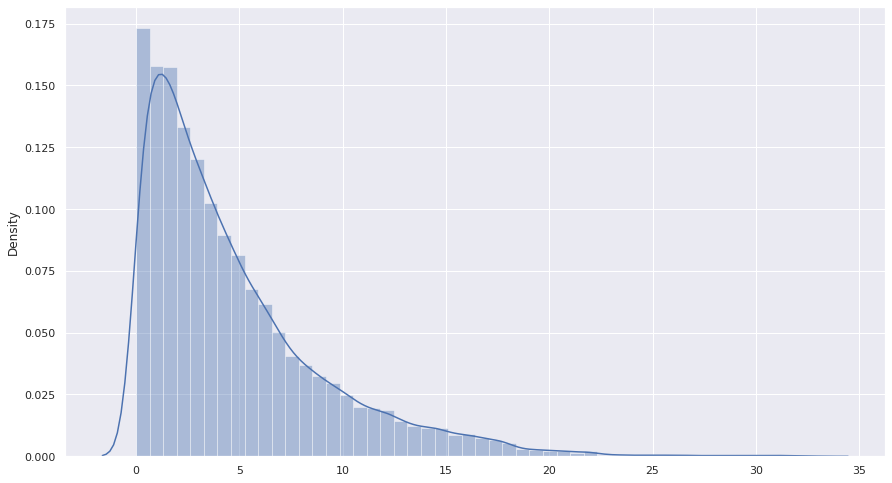

time: 804 ms (started: 2021-11-12 00:55:05 +00:00)


In [151]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
res = sns.distplot(X)
plt.show()


In [164]:
optimum_price = y_pred.mean()

time: 2.47 ms (started: 2021-11-12 01:23:02 +00:00)


In [165]:
optimum_price

325.01110385491444

time: 7.18 ms (started: 2021-11-12 01:24:00 +00:00)


### The optimum price of  predicting all the values of x_test['wait_min'] is Rs.325.01 

### 'WAit_sec' is a skewed distribution which also a very weak relationship feature with the target feature of Trip_cost. 
### So, The accuracy of the model is not upto the range

# Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "first name_last name.ipynb" and email. Also, send screenshots of your results for each subquestion in a word file along with the assumptions you've taken, with a clear explanation.